## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [57]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [10]:
total_rows=df.shape[0]
print ('total number of rows'+':'+str(total_rows))

total number of rows:294478


c. The number of unique users in the dataset.

In [11]:
total_unique_users=df['user_id'].value_counts().sum()
print ('total number of unique users'+':'+str(total_unique_users))

total number of unique users:294478


d. The proportion of users converted.

In [12]:
converetd_proportion=df.query('converted=="1"').shape[0]/df.shape[0]
print ('total proportion of users converted'+':'+str(converetd_proportion))

total proportion of users converted:0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [13]:
number=df.query('group=="treatment" and landing_page!="new_page"').shape[0]
print ('The number of times the new_page and treatment dont match'''+':'+str(number))

The number of times the new_page and treatment dont match:1965


f. Do any of the rows have missing values?

In [14]:
df.isnull().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
df2=df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='control') & (df['landing_page']=='old_page'))]


In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
unique_user_ids=df2['user_id'].nunique()
print ('total number of unique user IDs'+':'+str(unique_user_ids))

total number of unique user IDs:290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
df2['user_id'].value_counts().idxmax()

773192

c. What is the row information for the repeat **user_id**? 

In [20]:
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [21]:
df2=df2.drop_duplicates(['user_id'])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [24]:
probability_convertion=df2['converted'].mean()
probability_convertion


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [33]:
total_controlGroup=df2.query('group=="control"')
total_conversions_CG=total_controlGroup.query('converted=="1"')
CG_con_probablilty=total_conversions_CG.shape[0]/total_controlGroup.shape[0]
CG_con_probablilty

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
total_treatmentGroup=df2.query('group=="treatment"')
total_conversions_TG=total_treatmentGroup.query('converted=="1"')
TG_con_probablilty=total_conversions_TG.shape[0]/total_treatmentGroup.shape[0]
TG_con_probablilty

0.11880806551510564

d. What is the probability that an individual received the new page?

In [34]:
landing_new=df2.query('landing_page=="new_page"')
probabbility_new_page=landing_new.shape[0]/df2.shape[0]
probabbility_new_page
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [29]:
landing_old=df2.query('landing_page=="old_page"')
probabbility_old_page=landing_old.shape[0]/df2.shape[0]
probabbility_old_page

0.4999380557773312

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Below are the evidances we have so far
Conversion rate for control group is 0.1203863045004612
Conversion rate for treatment group is 0.11880806551510564
Total Coversion rate is 0.11959708724499628

At this point there we cannot say if new page leads to more conversions, interestgly its opposiste, if we compare the conversion rate for control group with the total conversion rate, there is a increase of 0.8% but there is a decrease of 0.8% when we compare the conversion rate of treatment group with total conversion rate which is 11.9%. Since the difference is very smalland the data is not from the entire data set we cannot conclude which is better yet but looks like old page is looking good so far





<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0=𝑝𝑛𝑒𝑤<=𝑝𝑜𝑙𝑑


H1=𝑝𝑛𝑒𝑤>𝑝𝑜𝑙𝑑

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [36]:
p_new = (df2.converted == 1).mean()
print ('conversion rate of Pnew is'+':'+str(p_new))

conversion rate of Pnew is:0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [37]:
p_old = (df2.converted == 1).mean()
print('conversion rate of Pold is'+':'+str(p_old))

conversion rate of Pold is:0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [38]:
n_new=df2.query('group=="treatment"').shape[0]
print('total number of indivudals in treatment group'+':'+str(n_new))

total number of indivudals in treatment group:145310


d. What is $n_{old}$, the number of individuals in the control group?

In [39]:
n_old=df2.query('group=="control"').shape[0]
print('total number of indivudals in control group'+':'+str(n_old))

total number of indivudals in control group:145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [43]:
new_page_converted=np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11950313123666643

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [44]:
old_page_converted=np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11951209438715805

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [46]:
new_page_converted.mean()-old_page_converted.mean()

-8.9631504916198868e-06

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [47]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.binomial(1,p_new,n_new)
    old_page_converted=np.random.binomial(1,p_old,n_old)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    6.,    75.,   439.,  1537.,  2864.,  2828.,  1611.,   537.,
           96.,     7.]),
 array([ -4.77886705e-03,  -3.83109186e-03,  -2.88331667e-03,
         -1.93554149e-03,  -9.87766300e-04,  -3.99911132e-05,
          9.07784073e-04,   1.85555926e-03,   2.80333445e-03,
          3.75110963e-03,   4.69888482e-03]),
 <a list of 10 Patch objects>)

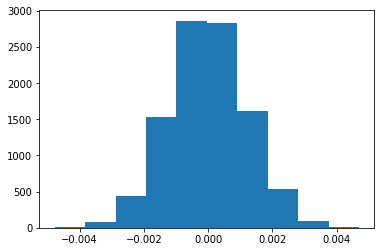

In [48]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

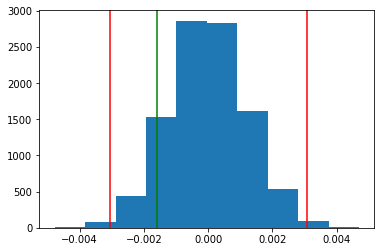

In [52]:
obs_diff=df2.query('group=="treatment"')['converted'].mean()-df2.query('group=="control"')['converted'].mean()
plt.hist(p_diffs)
lower,upper=np.percentile(p_diffs,0.5), np.percentile(p_diffs,99.5)
plt.axvline(x=lower,color='red')
plt.axvline(x=upper,color='red')
plt.axvline(x=obs_diff,color='green')


In [50]:
(p_diffs>obs_diff).mean()

0.90890000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part J we  calculated the actual observed difference statistic which was -0.0015782389853555567, our aim is try to find out where this obersved difference statistic falls in our normal distribution that we computed in step H assuming Null hypothesis is true. According to Central limit theorm with the increase in sample size means follow a normal distribution which is computed in Step h. We can see from the above normal distribution that our observed statistic seems to be coming from this distribution(green line) which covers more than half of the distribution.Next we computed P-value to evaluate the statistical significance of the observed statsitic which is 0.90890000000000004 which is <0.005 and hence we fail to reject Null Hypothesis  since there is no significant evidence suggesting that the new page is better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [57]:
import statsmodels.api as sm

convert_old =df2.query('group == "control" and converted == 1').shape[0]
convert_new =  df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [58]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z score is the number of standrad deviations from the mean a data point is.In standrad normal distribution, 1 standard deviation covers 68.27% of the data, 2 standard deviations cover 95.45% of the data.we have a Z score of 1.31 which is between 1 and 2, this puts over p value in this distribution . with P value greater than 0.05 we fail to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we are dealing with categorical vairable we would use logistic regression  model

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [58]:
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [59]:
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:07:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [77]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

P-value for old page is old page i 0
P-value for new Page is 0.19 which is >0.05, it proves that it is not statistically sigificant 
These value differ from A/B testing because in A/B testing we calculated P-value assuming that the null hypothesis is true which means that the old page is better or equal to new page but in regression we did not assume that. In regression we test if intercept or slope is equal to zero or is not equal to zero

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider things that might influence the conversion as long as the independent variables are not related with one another. We always want to make sure that none of the variables across the X-axis are dependent on each other to avoid collinearity problem.If we decide to add more dependent variables we should compare X-variables usinf pairplot or calculate VIF and remove one of the variables if any two are related to each other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [69]:
countries=pd.read_csv('countries.csv')
df_join=df2.join(countries.set_index('user_id'), on='user_id',how='inner')
df_join[['CA','UK','US']]=pd.get_dummies(df_join['country'])
df_join['intercept']=1
logit_mod=sm.Logit(df_join['converted'],df_join[['intercept','CA','UK']])
results=logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Dec 2019   Pseudo R-squ.:               1.521e-05
Time:                        19:49:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [75]:
np.exp(0.0099), 1/np.exp(-0.0408)

(1.0099491671175422, 1.0416437559600236)

Since we used the baseline as US, we are comparing the results against US
CA is 1.041 times less likely to convert when compared with US
UK is 1.009 times more likely to convert when compared with US

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [71]:
df_join['UK_ab_page']=df_join['UK']*df_join['ab_page']
df_join['US_ab_page']=df_join['US']*df_join['ab_page']
df_join['CA_ab_page']=df_join['CA']*df_join['ab_page']
df_join.head()
df_join['intercept']=1
logit_mod=sm.Logit(df_join['converted'],df_join[['intercept','UK_ab_page','CA_ab_page']])
results=logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Dec 2019   Pseudo R-squ.:               2.364e-05
Time:                        19:54:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
UK_ab_page     0.0149      0.017      0.862      0.389      -0.019       0.049
CA_ab_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
==============================================================================
"""

In [74]:
np.exp(0.0149), 1/np.exp(-0.0752)

(1.0150115583846535, 1.0780997492739288)

Since we used the baseline as US, we are comparing the results against US:


UK is 1.015 times more likely to convert when compared with US

CA is 1.078 times less likely to convert when compared with US

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0